In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(r'Data.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data = data.drop(columns=['InvoiceNo', 
                      'StockCode', 
                      'Description', 
                      'InvoiceDate',
                      'CustomerID',
                          'Country', 
                ])
data

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   541909 non-null  int64  
 1   UnitPrice  541909 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.3 MB


In [6]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [7]:
data.duplicated().sum()

533515

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
missing = pd.DataFrame({
    'Total Missing': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})
missing

,Total Missing,Missing Percentage
Quantity,0,0.0
UnitPrice,0,0.0


In [10]:
data = data.dropna()

In [11]:
missing = pd.DataFrame({
    'Total Missing': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})
missing

,Total Missing,Missing Percentage
Quantity,0,0.0
UnitPrice,0,0.0


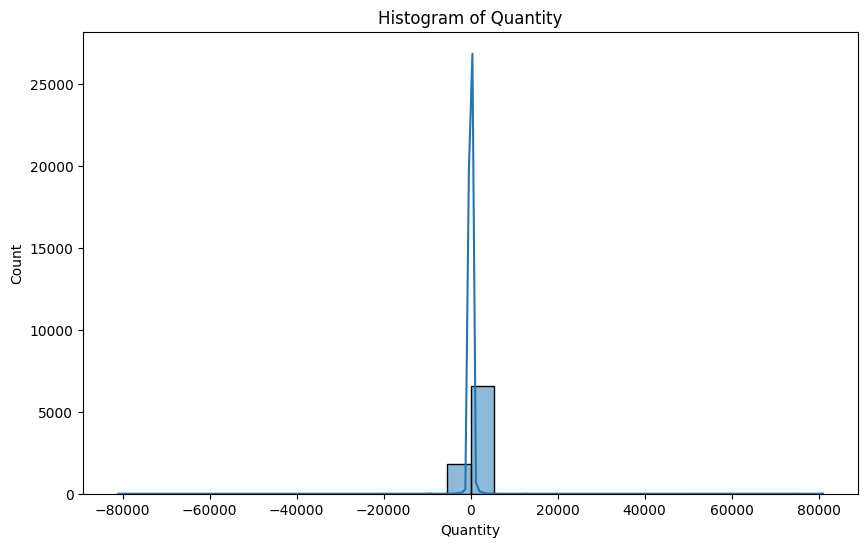

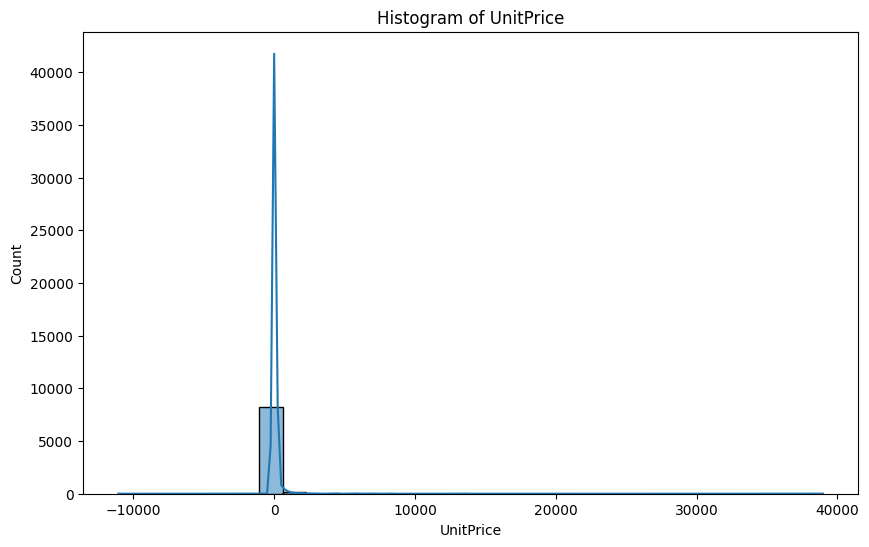

In [12]:
for col in data.columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Histogram of {col}')
    sns.histplot(data[col], bins=30, kde=True)
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data['Quantity']
Y = data['UnitPrice']
X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 42)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [18]:
## confusion matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

y_pred = knn.predict(x_test)
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")


y_test_binary = (y_test > y_test.mean()).astype(int)
y_pred_binary = (y_pred > y_test.mean()).astype(int)

acc = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {acc}")


MSE: 316693.06560190354
MAE: 80.62131387730791
RMSE: 562.7548894517963
Accuracy: 0.8737343656938654


In [19]:
# f1 Score
from sklearn.metrics import f1_score

# Convert y_test and y_pred to binary values for classification metrics
y_test_binary = (y_test > y_test.mean()).astype(int)
y_pred_binary = (y_pred > y_pred.mean()).astype(int)

f1 = f1_score(y_test_binary, y_pred_binary, average='binary')
print(f"F1 Score: {f1}")



F1 Score: 0.002466091245376079


In [20]:
# r2 score, precision, accuracy
from sklearn.metrics import r2_score, precision_score, accuracy_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

precision = precision_score(y_test_binary, y_pred_binary, average='binary')
print(f"Precision: {precision}")

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

R2 Score: -0.021003134135046952
Precision: 0.001669449081803005
Accuracy: 0.5181655747468732


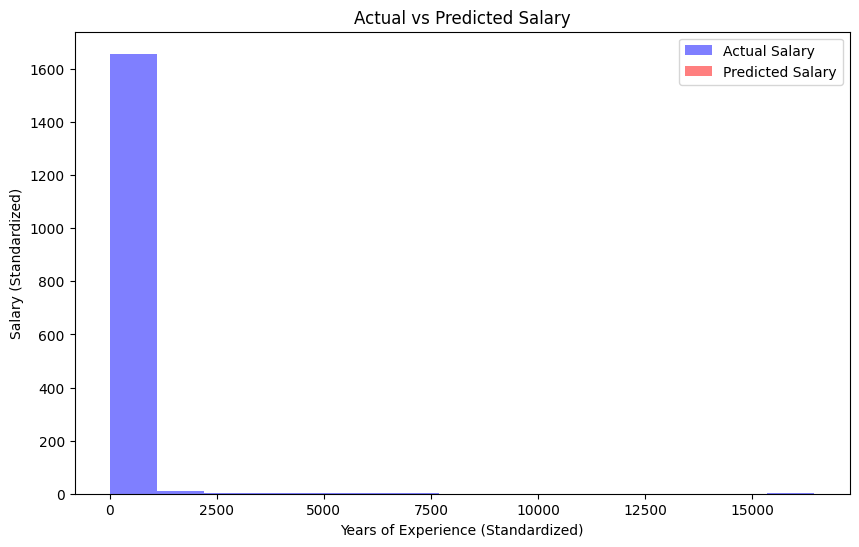

In [21]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=15, alpha=0.5, label='Actual Salary', color='blue')
plt.hist(y_pred, bins=15, alpha=0.5, label='Predicted Salary', color='red')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Years of Experience (Standardized)')
plt.ylabel('Salary (Standardized)')
plt.legend()
plt.show()